In [48]:
# IMPORT ALL DEPENDENCIES

import os
import cv2
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np
import math
from scipy.spatial import distance as distance_module


In [49]:
# DECLARING ALL PATHS AND VARIABLES.

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations\\"
IMG_DIR = DATA_DIR + "\\" + "Images\\"
PROCESSESED_PATH = DATA_DIR + '\\' + 'ProcessedDatasets\\'
AVAILABLE_CLASSES = ['n02089078-black-and-tan_coonhound','n02091831-Saluki','n02092002-Scottish_deerhound','n02095314-wire-haired_fox_terrier']


CLASS_NAMES = []
CLASS_CODES = []
ANNOTATION_PATHS = []
IMAGE_PATHS = []
PROCESSED_IMAGE_PATHS = []


for i in range(4):
    CLASS_NAMES.append("-".join(AVAILABLE_CLASSES[i].split("-")[1:]))
    CLASS_CODES.append(AVAILABLE_CLASSES[i].split("-")[0])
    ANNOTATION_PATHS.append(ANNOTATIONS_DIR + AVAILABLE_CLASSES[i] + "\\" )
    IMAGE_PATHS.append(IMG_DIR + AVAILABLE_CLASSES[i] + "\\")
    PROCESSED_IMAGE_PATHS.append(PROCESSESED_PATH + CLASS_CODES[i]+"-" +CLASS_NAMES[i]+ "\\")

print(IMAGE_PATHS)


['c:\\Users\\kaasa\\Documents\\GitHub\\Data-Mining-1\\DataSet\\Images\\n02089078-black-and-tan_coonhound\\', 'c:\\Users\\kaasa\\Documents\\GitHub\\Data-Mining-1\\DataSet\\Images\\n02091831-Saluki\\', 'c:\\Users\\kaasa\\Documents\\GitHub\\Data-Mining-1\\DataSet\\Images\\n02092002-Scottish_deerhound\\', 'c:\\Users\\kaasa\\Documents\\GitHub\\Data-Mining-1\\DataSet\\Images\\n02095314-wire-haired_fox_terrier\\']


In [50]:
# FUNCTION TO PROCESS THE IMAGE BASED ON THE CORRESPONDING ANNOTATIONS.

def get_bounding_boxes(annot):
  xml = annot
  tree = ET.parse(xml)
  root = tree.getroot()
  objects = root.findall('object')
  bbox = []
  for o in objects:
    bndbox = o.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    bbox.append((xmin,ymin,xmax,ymax))
  return bbox

#FUNCTION TO CROP EVERY IMAGE IN EVERY CLASS AND SAVE IN A PROCESSED DIRECTORY.

def crop_image(image_path , annotation_path,save_path):
  img = cv2.imread(image_path)
  bb = get_bounding_boxes(annotation_path)
  bbox = bb[0]
  cropped_data = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]    # cropping the image
  cropped_data = cv2.resize(cropped_data,dsize=(331 ,331),interpolation=cv2.INTER_CUBIC) # rescaling it to a square image
  crop_img = Image.fromarray(cropped_data,'RGB')  # converting the numpy array to an image
  crop_img.save(save_path)
  


  

In [51]:


for i in range(4):
    for dog in os.listdir(IMAGE_PATHS[i]):
        image_path = dog
        annotation_path = dog.split(".")[0]
        if not os.path.exists(PROCESSED_IMAGE_PATHS[i]):
            os.mkdir(PROCESSED_IMAGE_PATHS[i])
        crop_image(IMAGE_PATHS[i]+  image_path, ANNOTATION_PATHS[i] + annotation_path, PROCESSED_IMAGE_PATHS[i] + dog)



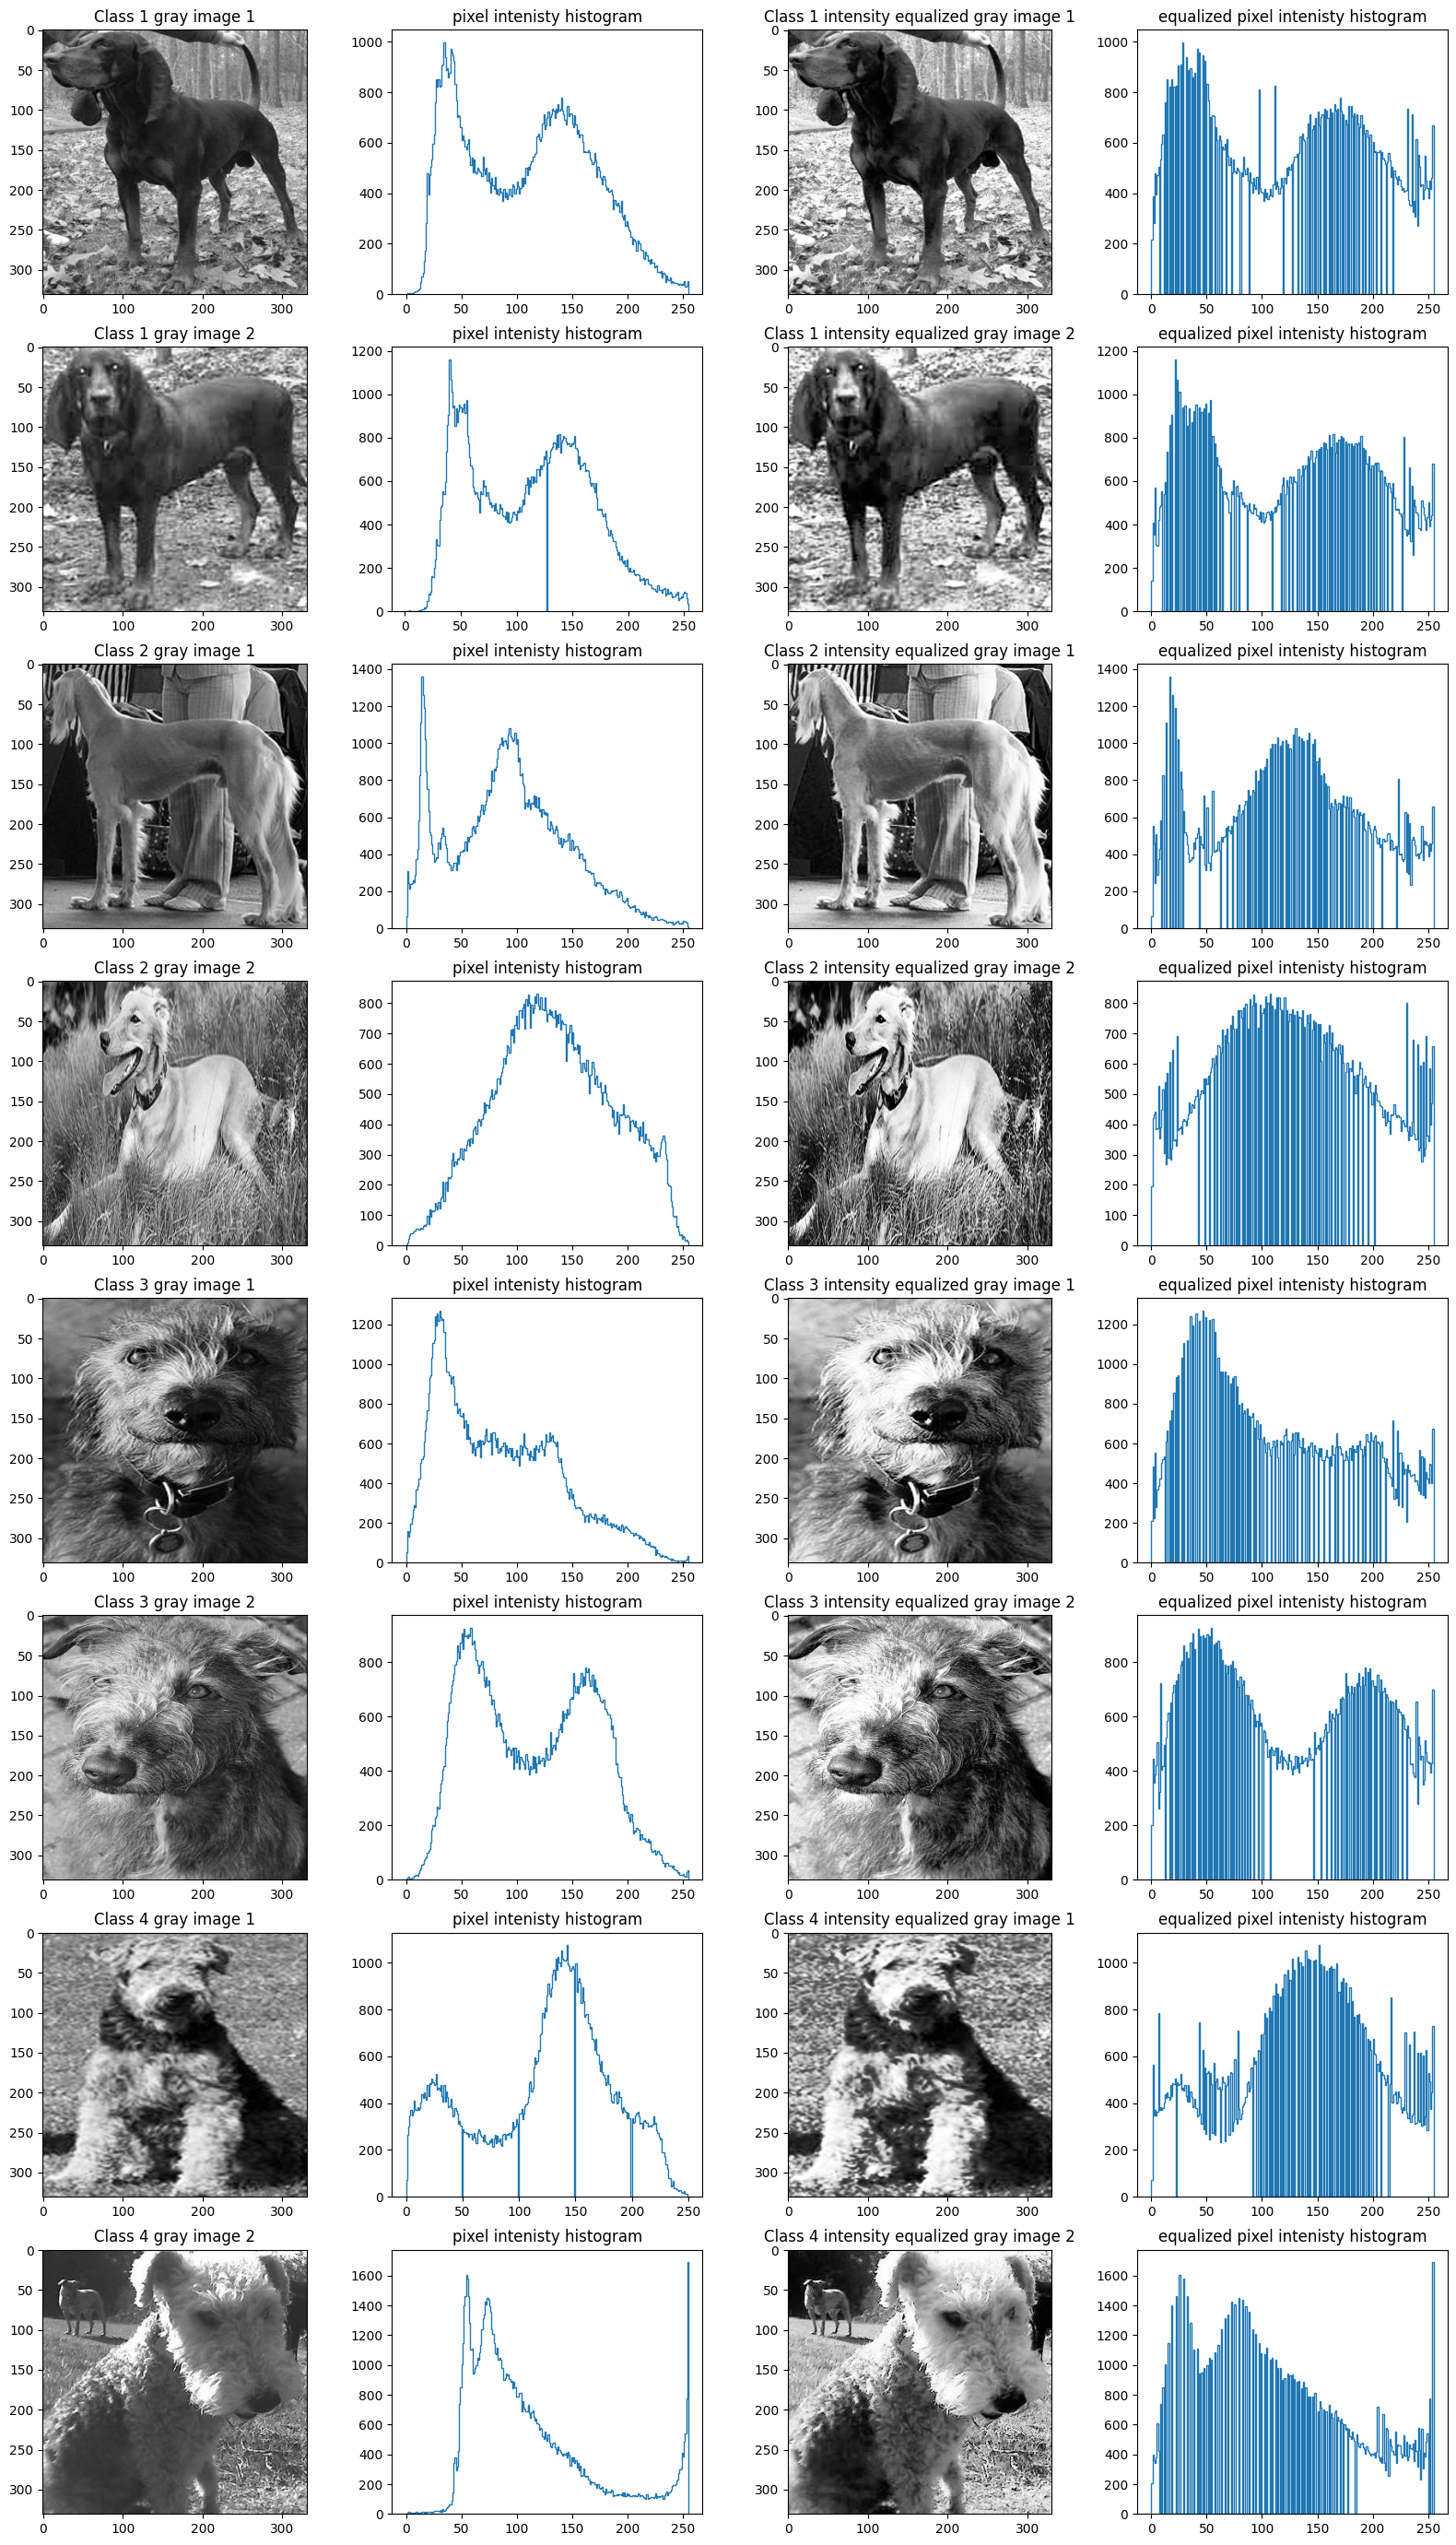

In [55]:
#Refered yagnaVNK/ Data-Mining-1/Assignment1 repository

import os

fig = plt.figure(figsize=(20, 35))

rows = 8
columns = 4


for i in range(4):

    img1 = cv2.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[np.random.randint(0,40)] )
    img2 = cv2.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[np.random.randint(0,40)] )
    img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    arr_1 =img1_gray.flatten()
    arr_2 =img2_gray.flatten()

    fig.add_subplot(rows,columns,8*i+1)
    plt.imshow(img1_gray,cmap='gray')
    plt.title("Class "+str(i+1)+" gray image 1")


    fig.add_subplot(rows,columns,2*(4*i+1))
    plt.hist(arr_1,bins=255,histtype='step')
    plt.title("pixel intenisty histogram")

    fig.add_subplot(rows,columns,8*i+5)
    plt.imshow(img2_gray,cmap='gray')
    plt.title("Class "+str(i+1)+" gray image 2")

    fig.add_subplot(rows,columns,2*(4*i+3))
    plt.hist(arr_2,bins=255,histtype='step')
    plt.title("pixel intenisty histogram")
    


    img1_eq = cv2.equalizeHist(img1_gray)
    img2_eq = cv2.equalizeHist(img2_gray)
    arr_1_eq =img1_eq.flatten()
    arr_2_eq =img2_eq.flatten()

    fig.add_subplot(rows,columns,8*i+3)
    plt.imshow(img1_eq,cmap='gray')
    plt.title("Class "+str(i+1)+" intensity equalized gray image 1")

    fig.add_subplot(rows,columns,4*(2*i+1))
    plt.hist(arr_1_eq,bins=255,histtype='step')
    plt.title("equalized pixel intenisty histogram")

    fig.add_subplot(rows,columns,8*i+7)
    plt.imshow(img2_eq,cmap='gray')
    plt.title("Class "+str(i+1)+" intensity equalized gray image 2")

    fig.add_subplot(rows,columns,8*(i+1))
    plt.hist(arr_2_eq,bins=255,histtype='step')
    plt.title("equalized pixel intenisty histogram")
    



<h1>RGB Histogram</h1>

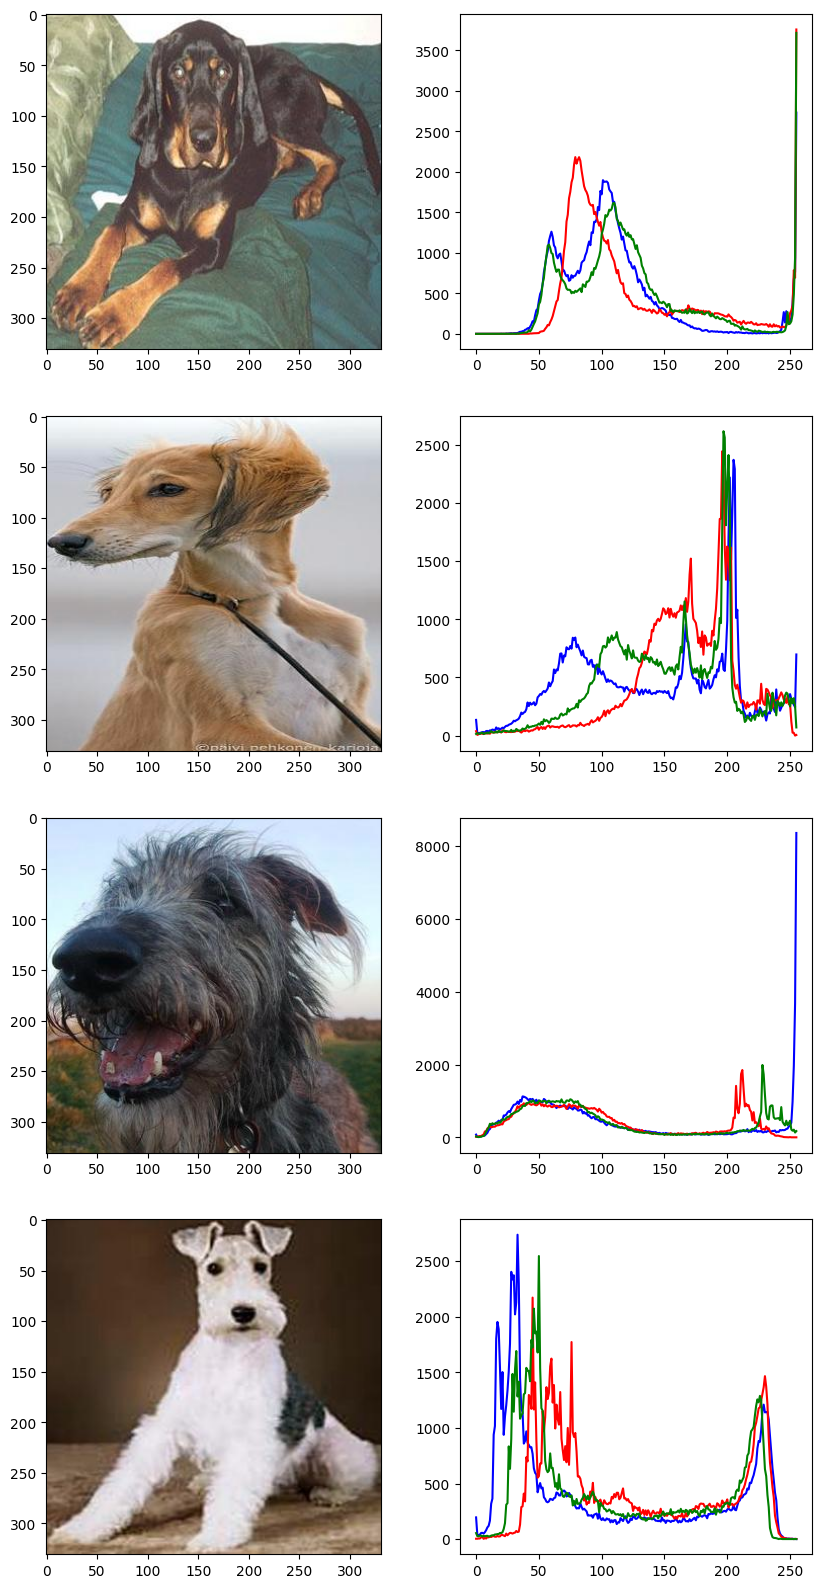

In [54]:
fig = plt.figure(figsize=(10, 20))

rows = 4
columns = 2


for i in range(4):

    img = cv2.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[np.random.randint(0,40)] ,cv2.IMREAD_COLOR)
    fig.add_subplot(rows,columns,2*(i)+1)
    plt.imshow(img)
    img_hist_blue = cv2.calcHist([img],[2],None,[256],[0,256])
    img_hist_red = cv2.calcHist([img],[0],None,[256],[0,256])
    img_hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
    

    fig.add_subplot(rows,columns,2*(i+1))
    plt.plot(img_hist_blue,color='blue')
    plt.plot(img_hist_red,color='red')
    plt.plot(img_hist_green,color='green')


<h1>Histogram Comparison</h1>

In [8]:

class_1 = np.random.randint(0,1)
class_2 = np.random.randint(2,3)
img1_i = np.random.randint(0,40)
img2_i = np.random.randint(41,80)
img3_i = np.random.randint(0,50)


img1_class_1 = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] +  os.listdir(PROCESSED_IMAGE_PATHS[class_1])[img1_i] )
img2_class_1 = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] +  os.listdir(PROCESSED_IMAGE_PATHS[class_1])[img2_i] )
img3_class_2 = cv2.imread(PROCESSED_IMAGE_PATHS[class_2] +  os.listdir(PROCESSED_IMAGE_PATHS[class_2])[img3_i] )

img1_gray_class_1 = cv2.cvtColor(img1_class_1,cv2.COLOR_BGR2GRAY)
img2_gray_class_1 = cv2.cvtColor(img2_class_1,cv2.COLOR_BGR2GRAY)
img3_gray_class_2 = cv2.cvtColor(img3_class_2,cv2.COLOR_BGR2GRAY)



img1_eq = cv2.equalizeHist(img1_gray_class_1)
img2_eq = cv2.equalizeHist(img2_gray_class_1)
img3_eq = cv2.equalizeHist(img3_gray_class_2)


hist1 = cv2.calcHist([img1_eq], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2_eq], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3_eq], [0], None, [256], [0, 256])


arr1= []
for i in hist1:
    arr1.append(i[0])

arr2= []
for i in hist2:
    arr2.append(i[0])

arr3= []
for i in hist3:
    arr3.append(i[0])



<h2>Euclidian Distance</h2>

<h4>Same Class 2 images</h4>

In [9]:
sum = 0
for i in range (0,256):
    sum = sum + (hist1[i][0]-hist2[i][0])**2
dist = math.sqrt(sum)
print('euclidean distance of same classes:', dist)


sum = 0
for i in range (0,256):
    sum = sum + (hist1[i][0]-hist3[i][0])**2
dist = math.sqrt(sum)
print('euclidean distance of different classes:', dist)


arr1= []
for i in hist1:
    arr1.append(i[0])

arr2= []
for i in hist2:
    arr2.append(i[0])

arr3= []
for i in hist3:
    arr3.append(i[0])


print(distance_module.euclidean(arr1, arr2))
print(distance_module.euclidean(arr1, arr3))



euclidean distance of same classes: 7384.3753967414195
euclidean distance of different classes: 8112.545223294598
7384.37548828125
8112.54541015625


In [10]:
from scipy.spatial.distance import cityblock

sum = 0
for i in range (0,256):
    sum = sum + abs(hist1[i][0]-hist2[i][0])
print('manhattan distance of same classes:', sum)


sum = 0
for i in range (0,256):
    sum = sum + abs(hist1[i][0]-hist3[i][0])
print('manhattan distance of different classes:', sum)



print(cityblock(arr1,arr2))
print(cityblock(arr1,arr3))



manhattan distance of same classes: 85822.0
manhattan distance of different classes: 101228.0
85822.0
101228.0


In [11]:

mean_arr1 = np.mean(arr1)
mean_arr2 = np.mean(arr2) 
mean_arr3 = np.mean(arr3)


prob_dist1 = arr1 / np.sum(arr1)
prob_dist2 = arr2 / np.sum(arr2)
prob_dist3 = arr3 / np.sum(arr3)


bc = np.sum(np.sqrt(prob_dist1 * prob_dist2))
#dist3 = -np.log(bc) + 0.5*np.log(std_arr1 * std_arr2/(std_arr1**2 + std_arr2**2)) + 0.5 * np.log(mean_arr1/mean_arr2)
dist = -np.log(bc)
print('bhattacharya distance of same classes:', dist)

bc = np.sum(np.sqrt(prob_dist1 * prob_dist3))
#dist2 = -np.log(bc) + 0.5*np.log(std_arr1 * std_arr3/(std_arr1**2 + std_arr3**2)) + 0.5 * np.log(mean_arr1/mean_arr3)
dist = -np.log(bc)
print('bhattacharya distance of different classes:', dist)

#print(dist3,dist2)
print(cv2.compareHist(hist1,hist2,cv2.HISTCMP_BHATTACHARYYA))
print(cv2.compareHist(hist1,hist3,cv2.HISTCMP_BHATTACHARYYA))

#bhattacharya distance of same classes: 0.34421483
#bhattacharya distance of different classes: 0.46494624

#0.5396511225453978
#0.6097795550313342

bhattacharya distance of same classes: 0.40989792
bhattacharya distance of different classes: 0.41054618
0.5798982813268624
0.5802690340155611


66650.0
58947.0


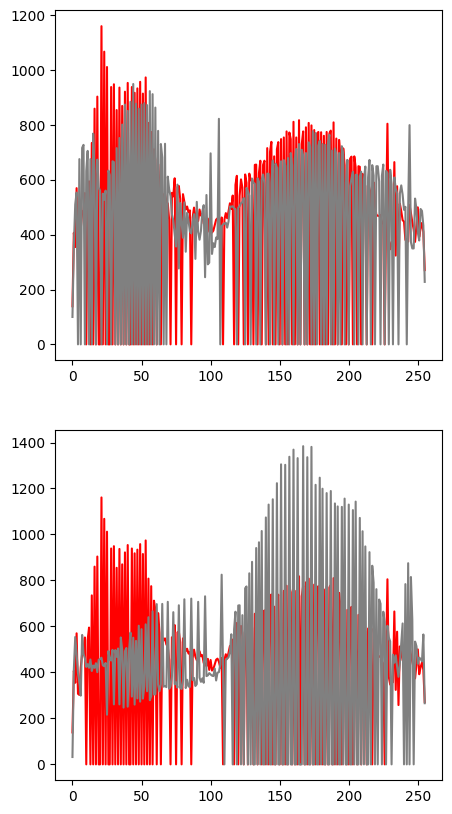

In [12]:
fig = plt.figure(figsize=(5, 10))

rows = 2
columns = 1

print(cv2.compareHist(hist1,hist2,cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1,hist3,cv2.HISTCMP_INTERSECT))

fig.add_subplot(rows,columns,1)
plt.plot(hist1,color = 'red')
plt.plot(hist2,color = 'grey')

fig.add_subplot(rows,columns,2)
plt.plot(hist1,color = 'red')
plt.plot(hist3,color = 'grey')

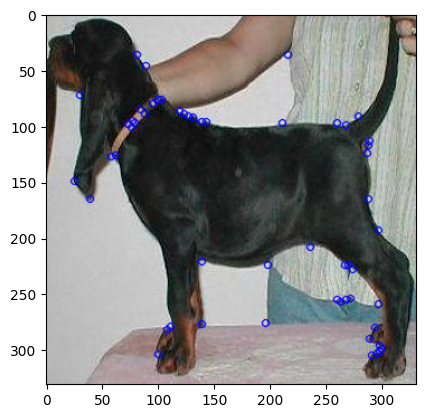

(<matplotlib.image.AxesImage at 0x222e1b1fbc0>, None)

In [13]:
edge_threshold = 25
patch_size = 20
keypoints = 55

img = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] +  os.listdir(PROCESSED_IMAGE_PATHS[class_1])[7] )
orb = cv2.ORB_create(edgeThreshold= edge_threshold,patchSize=patch_size, nlevels=1, fastThreshold=20,scaleFactor=2, WTA_K=4,scoreType=cv2.ORB_HARRIS_SCORE,firstLevel=0, nfeatures=keypoints)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,0,255), flags=0)
plt.imshow(img2), plt.show()


In [45]:
dataset_1 = []

dataset_2 = []

for dog in os.listdir(PROCESSED_IMAGE_PATHS[1]):
    img1_eq = cv2.imread(PROCESSED_IMAGE_PATHS[1] + dog,cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist([img1_eq], [0], None, [256], [0, 256])
    dataset_1.append(hist1)

#final_dataset_1 = np.array(dataset_1)[:,:,0]

for dog in os.listdir(PROCESSED_IMAGE_PATHS[3]):
    img2_eq = cv2.imread(PROCESSED_IMAGE_PATHS[3] + dog,cv2.IMREAD_GRAYSCALE)
    #img2_eq = cv2.equalizeHist(img1_gray_class_2)
    hist2 = cv2.calcHist([img2_eq], [0], None, [256], [0, 256])
        
    dataset_1.append(hist2)

dataset_1 = np.array(dataset_1)[:,:,0]

final_dataset_1 = np.transpose(dataset_1)


In [46]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = StandardScaler().fit_transform(final_dataset_1)

print(data.shape)
pca= PCA(n_components=2)
principalComponents_dog = pca.fit_transform(data)

principalComponents_dog.shape

(256, 357)


(256, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


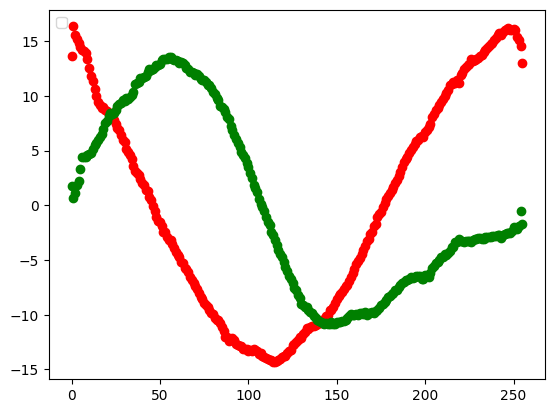

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

arr = np.linspace(0, 255, num=256)
plt.scatter(arr,principalComponents_dog[:,0],c='r')
plt.scatter(arr,principalComponents_dog[:,1],c='g')
plt.legend(loc='upper left')
plt.show()
